In [1]:
import numpy as np
import newbridge as nb
import parameters as prm
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
theta = np.zeros((prm.dof, prm.dim))
gvec = np.array([0.25, 0.25, 0.25])

d_param = prm.data(theta, gvec)
d_param.theta[4, 0] = 10 	# sigma * y 	in f0
d_param.theta[1, 0] = -10 	# sigma * x 	in f0
d_param.theta[1, 1] = 28 	# rho * x 		in f1
d_param.theta[13, 1] = -1 	# x * z 		in f1
d_param.theta[4, 1] = -1 	# y 			in f1
d_param.theta[10, 2] = 1 	# x * y 		in f2
d_param.theta[7, 2] = -8/3 	# beta * z 		in f2 
ic = np.array([[1., 1., 1.], [0.8, 0.8, 0.8], [0.4, 0.4, 0.4], [0.2, 0.2, 0.2]])
it = np.zeros((ic.shape[0]))
euler_param = prm.euler_maruyama(ic, it)
xout, tout = nb.createpaths(d_param, euler_param)

In [3]:
# save to file
import pickle
with open('nem_3Dnotebook.pkl','wb') as f:
    pickle.dump([xout, tout, d_param, euler_param], f)

In [4]:
# load data
import pickle
with open('nem_3D.pkl','rb') as f:
    allx, allt, d_param, euler_param = pickle.load(f)

theta = 0.1 * np.random.randn(prm.dof, prm.dim)
data_param = prm.data(theta = theta, gvec = d_param.gvec)

"""
Default parameters for Expectation-Maximization
em_param = param.em(tol = 1e-3, burninpaths = 10, mcmcpaths = 100, numsubintervals = 10, niter = 100, dt = (allt[0, 1, 0] - allt[0, 0, 0]))
"""
em_param = prm.em(dt = allt[0, 1] - allt[0, 0])

In [5]:
print(xout.shape)

(4, 101, 3)


In [6]:
print(tout.shape)

(4, 101)


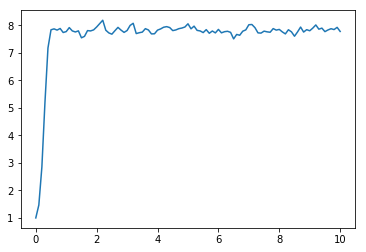

In [7]:
plt.plot(tout[0, :], xout[0, :, 0])

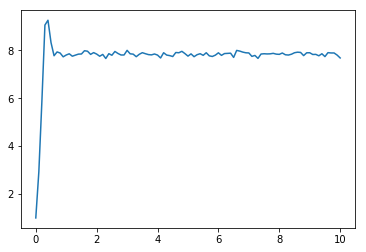

In [8]:
plt.plot(tout[0, :], xout[0, :, 1])

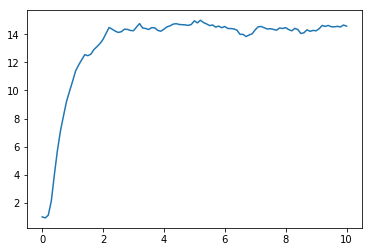

In [9]:
plt.plot(tout[0, :], xout[0, :, 2])

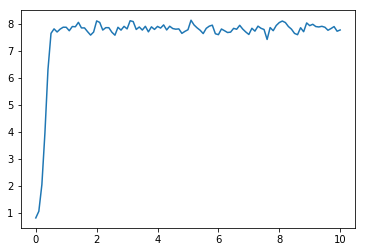

In [10]:
plt.plot(tout[1, :], xout[1, :, 0])

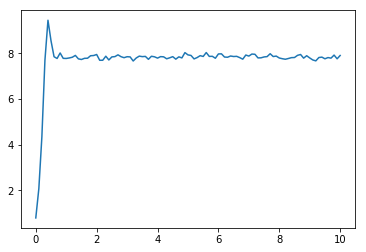

In [11]:
plt.plot(tout[1, :], xout[1, :, 1])

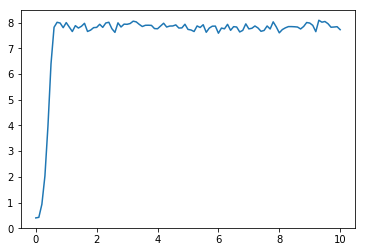

In [12]:
plt.plot(tout[2, :], xout[2, :, 0])

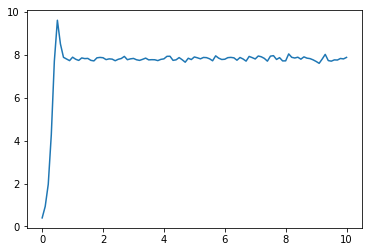

In [13]:
plt.plot(tout[2, :], xout[2, :, 1])